<a href="https://colab.research.google.com/github/promckkon/MK-DCNN/blob/main/ComHSPSO26217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


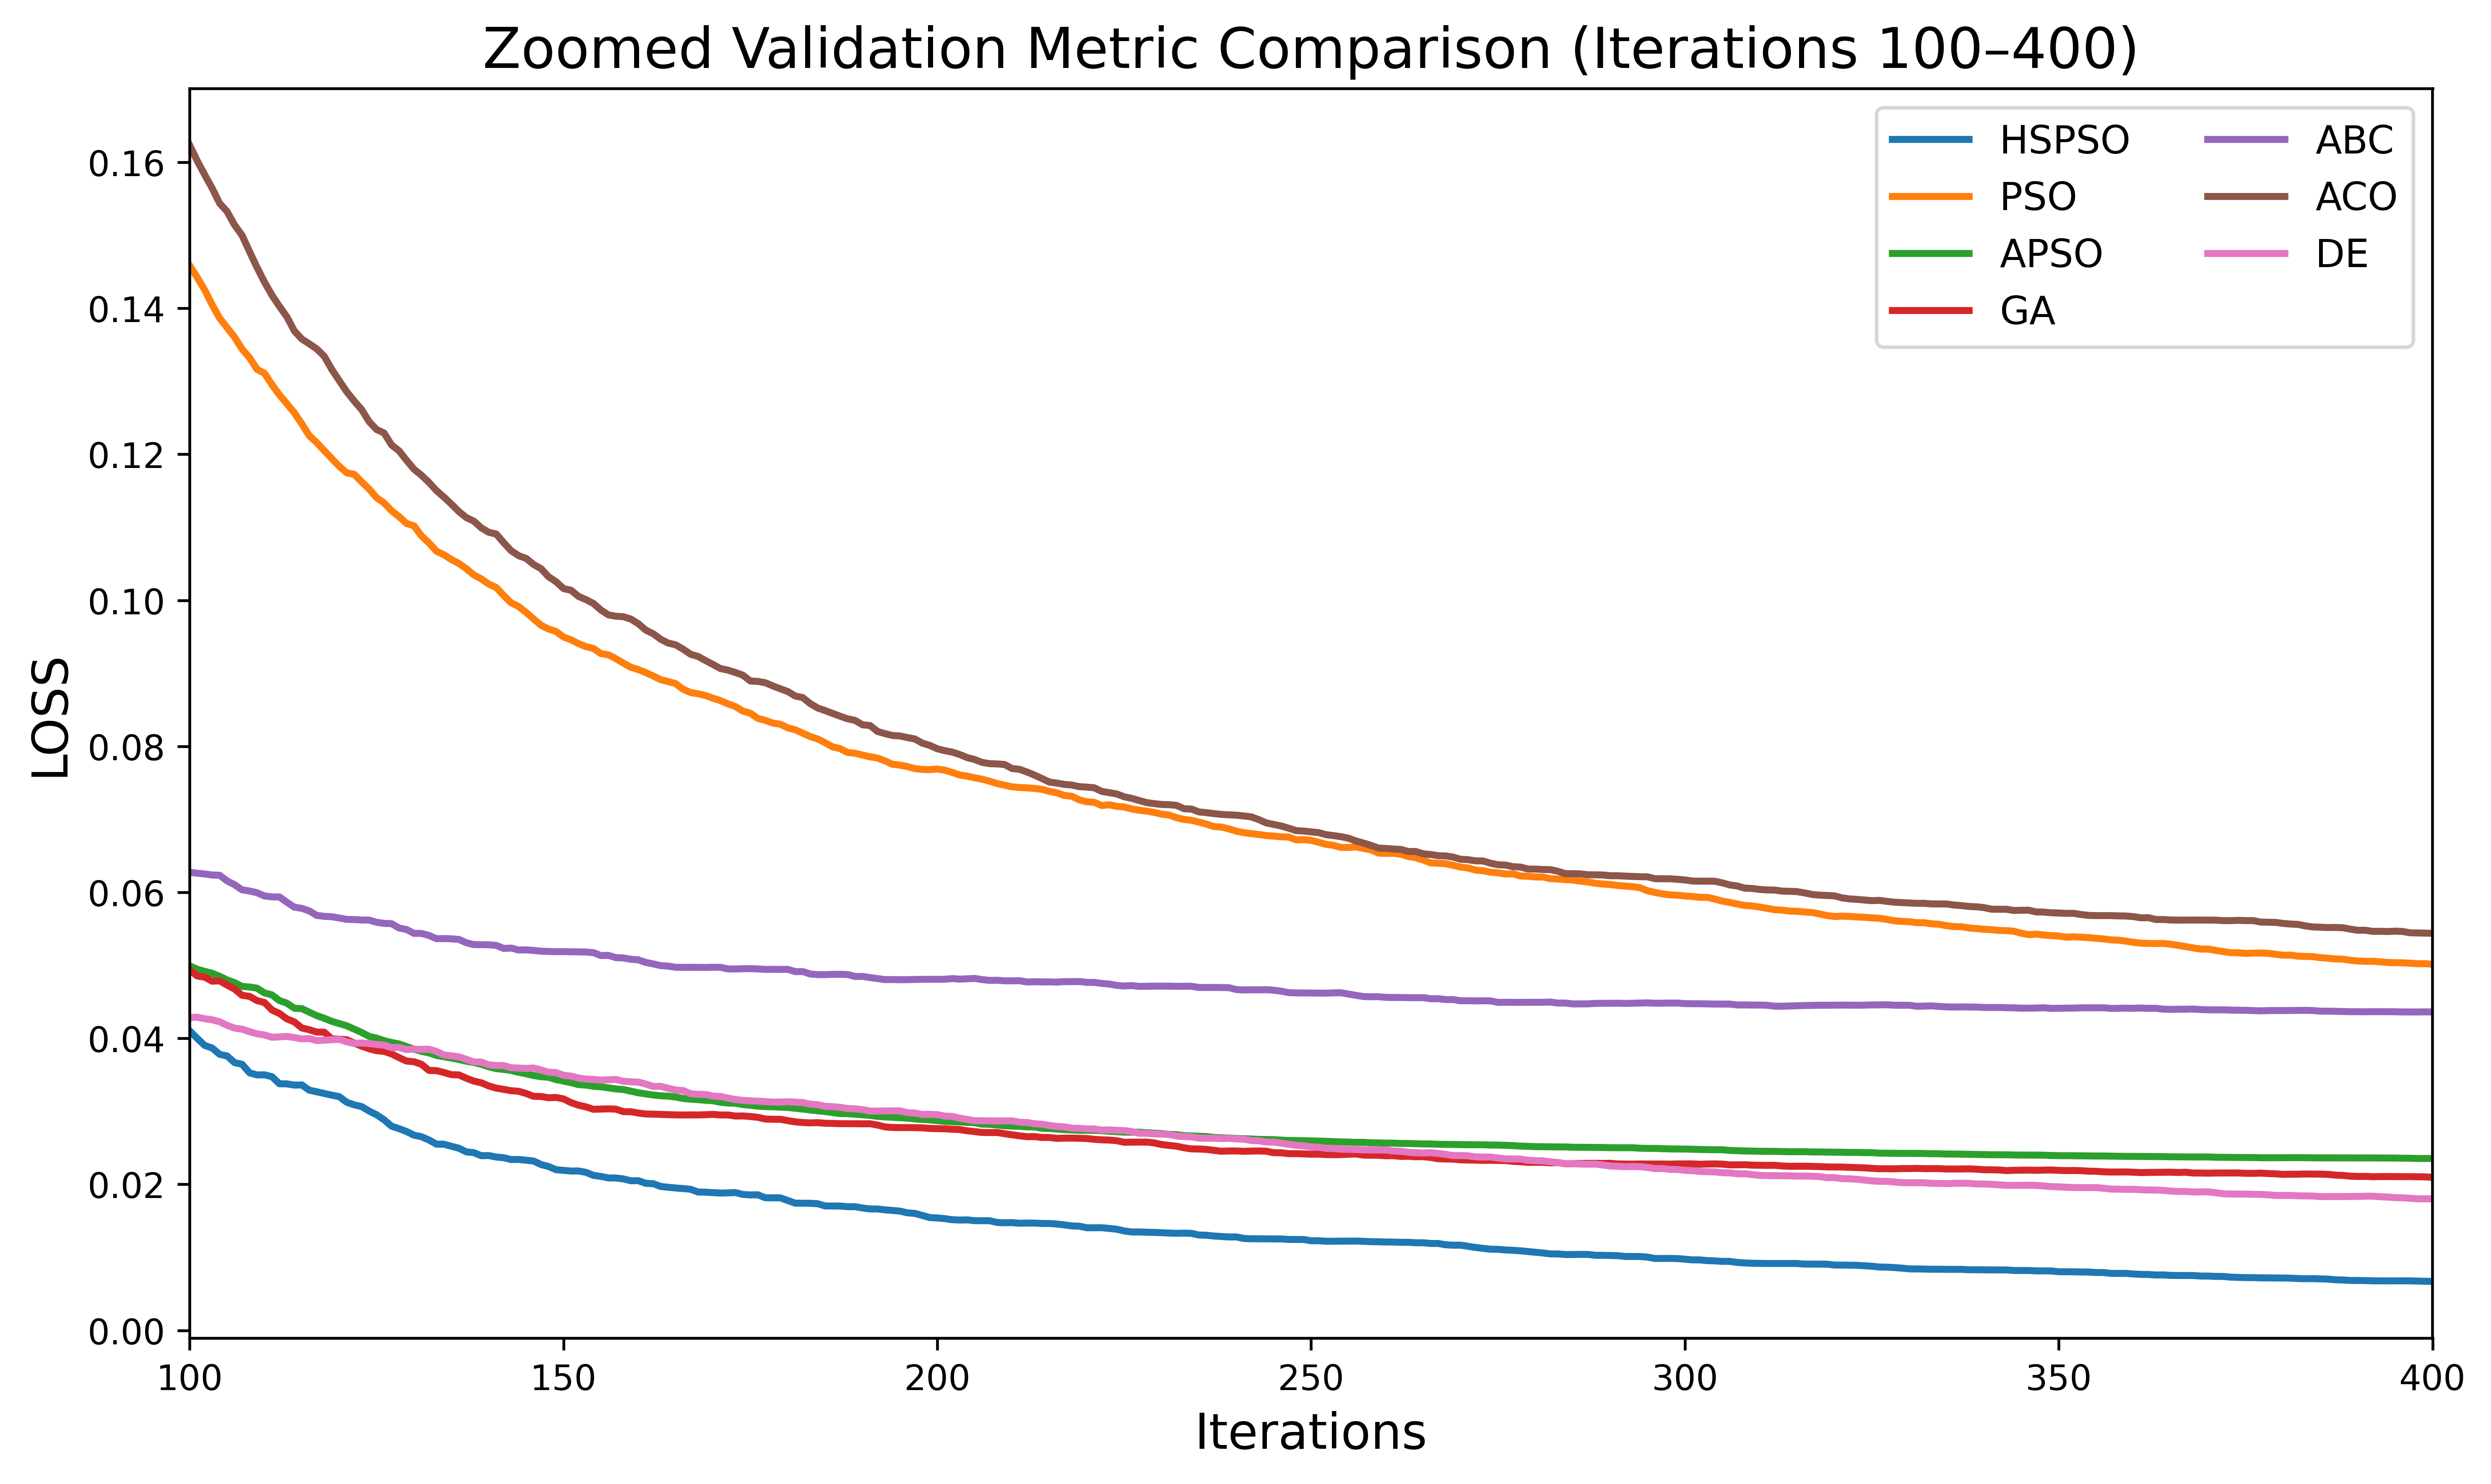

[Saved] /content/drive/MyDrive/ALL_methods_val_curve_zoom_100_400_20x6.png


In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 你各方法 CSV 的路徑（Drive）=====
csv_map = {
    "HSPSO": "/content/drive/MyDrive/HSPSO_metric_curve_1000.csv",
    "PSO":   "/content/drive/MyDrive/PSO_metric_curve_1000.csv",
    "APSO":  "/content/drive/MyDrive/APSO_metric_curve_1000.csv",
    "GA":    "/content/drive/MyDrive/GA_metric_curve_1000.csv",
    "ABC":   "/content/drive/MyDrive/ABC_metric_curve_1000.csv",
    "ACO":   "/content/drive/MyDrive/ACO_metric_curve_1000.csv",
    "DE":    "/content/drive/MyDrive/DE_metric_curve_1000.csv",
}
color_map = {
    "HSPSO": "#d62728",      # 紅色（強調）
    "PSO": "#1f77b4",        # 藍色
    "APSO": "#2ca02c",       # 綠色
    "GA": "#9467bd",         # 紫色
    "ABC": "#ff7f0e",        # 橘色
    "ACO": "#17becf",        # 青色
    "DE": "#000000"          # 黑色
}


# ===== 要放大看的區間 =====
x_start, x_end = 100, 400

# ===== 讀取可用檔案 =====
data = {}
missing = []

for name, path in csv_map.items():
    if not os.path.exists(path):
        missing.append(name)
        continue

    df = pd.read_csv(path)
    val_cols = [c for c in df.columns if c.startswith("Val_")]
    if len(val_cols) == 0:
        print(f"⚠️ {name} 找不到 Val_ 欄位，跳過")
        continue

    val_col = val_cols[0]
    data[name] = (df["Iteration"].values, df[val_col].values)

if missing:
    print("⚠️ 這些方法的 CSV 沒找到（先略過）：", missing)

if len(data) == 0:
    raise RuntimeError("沒有任何可用的 CSV 被讀到，請確認 Drive 路徑與檔名。")

# ===== 畫放大區域圖 =====
plt.figure(figsize=(10,6), dpi=600)

for name, (it, y) in data.items():
    it = np.array(it)
    y  = np.array(y)

    mask = (it >= x_start) & (it <= x_end)
    if mask.sum() == 0:
        print(f"⚠️ {name} 在 {x_start}~{x_end} 沒有資料點，跳過")
        continue

    plt.plot(it[mask], y[mask], linewidth=2, label=name)

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("LOSS", fontsize=14)
plt.title(f"Zoomed Validation Metric Comparison (Iterations {x_start}–{x_end})", fontsize=16)

# X 軸每 10 一格（放大區域比較清楚）


# 不要格線
# plt.grid(False)

plt.xlim(x_start, x_end)
plt.legend(fontsize=11, ncol=2)
plt.tight_layout()

# ===== 存到 Drive =====
out_path = f"/content/drive/MyDrive/ALL_methods_val_curve_zoom_{x_start}_{x_end}_20x6.png"
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()

print("[Saved]", out_path)


Saved 600dpi PNG: convergence_600dpi.png


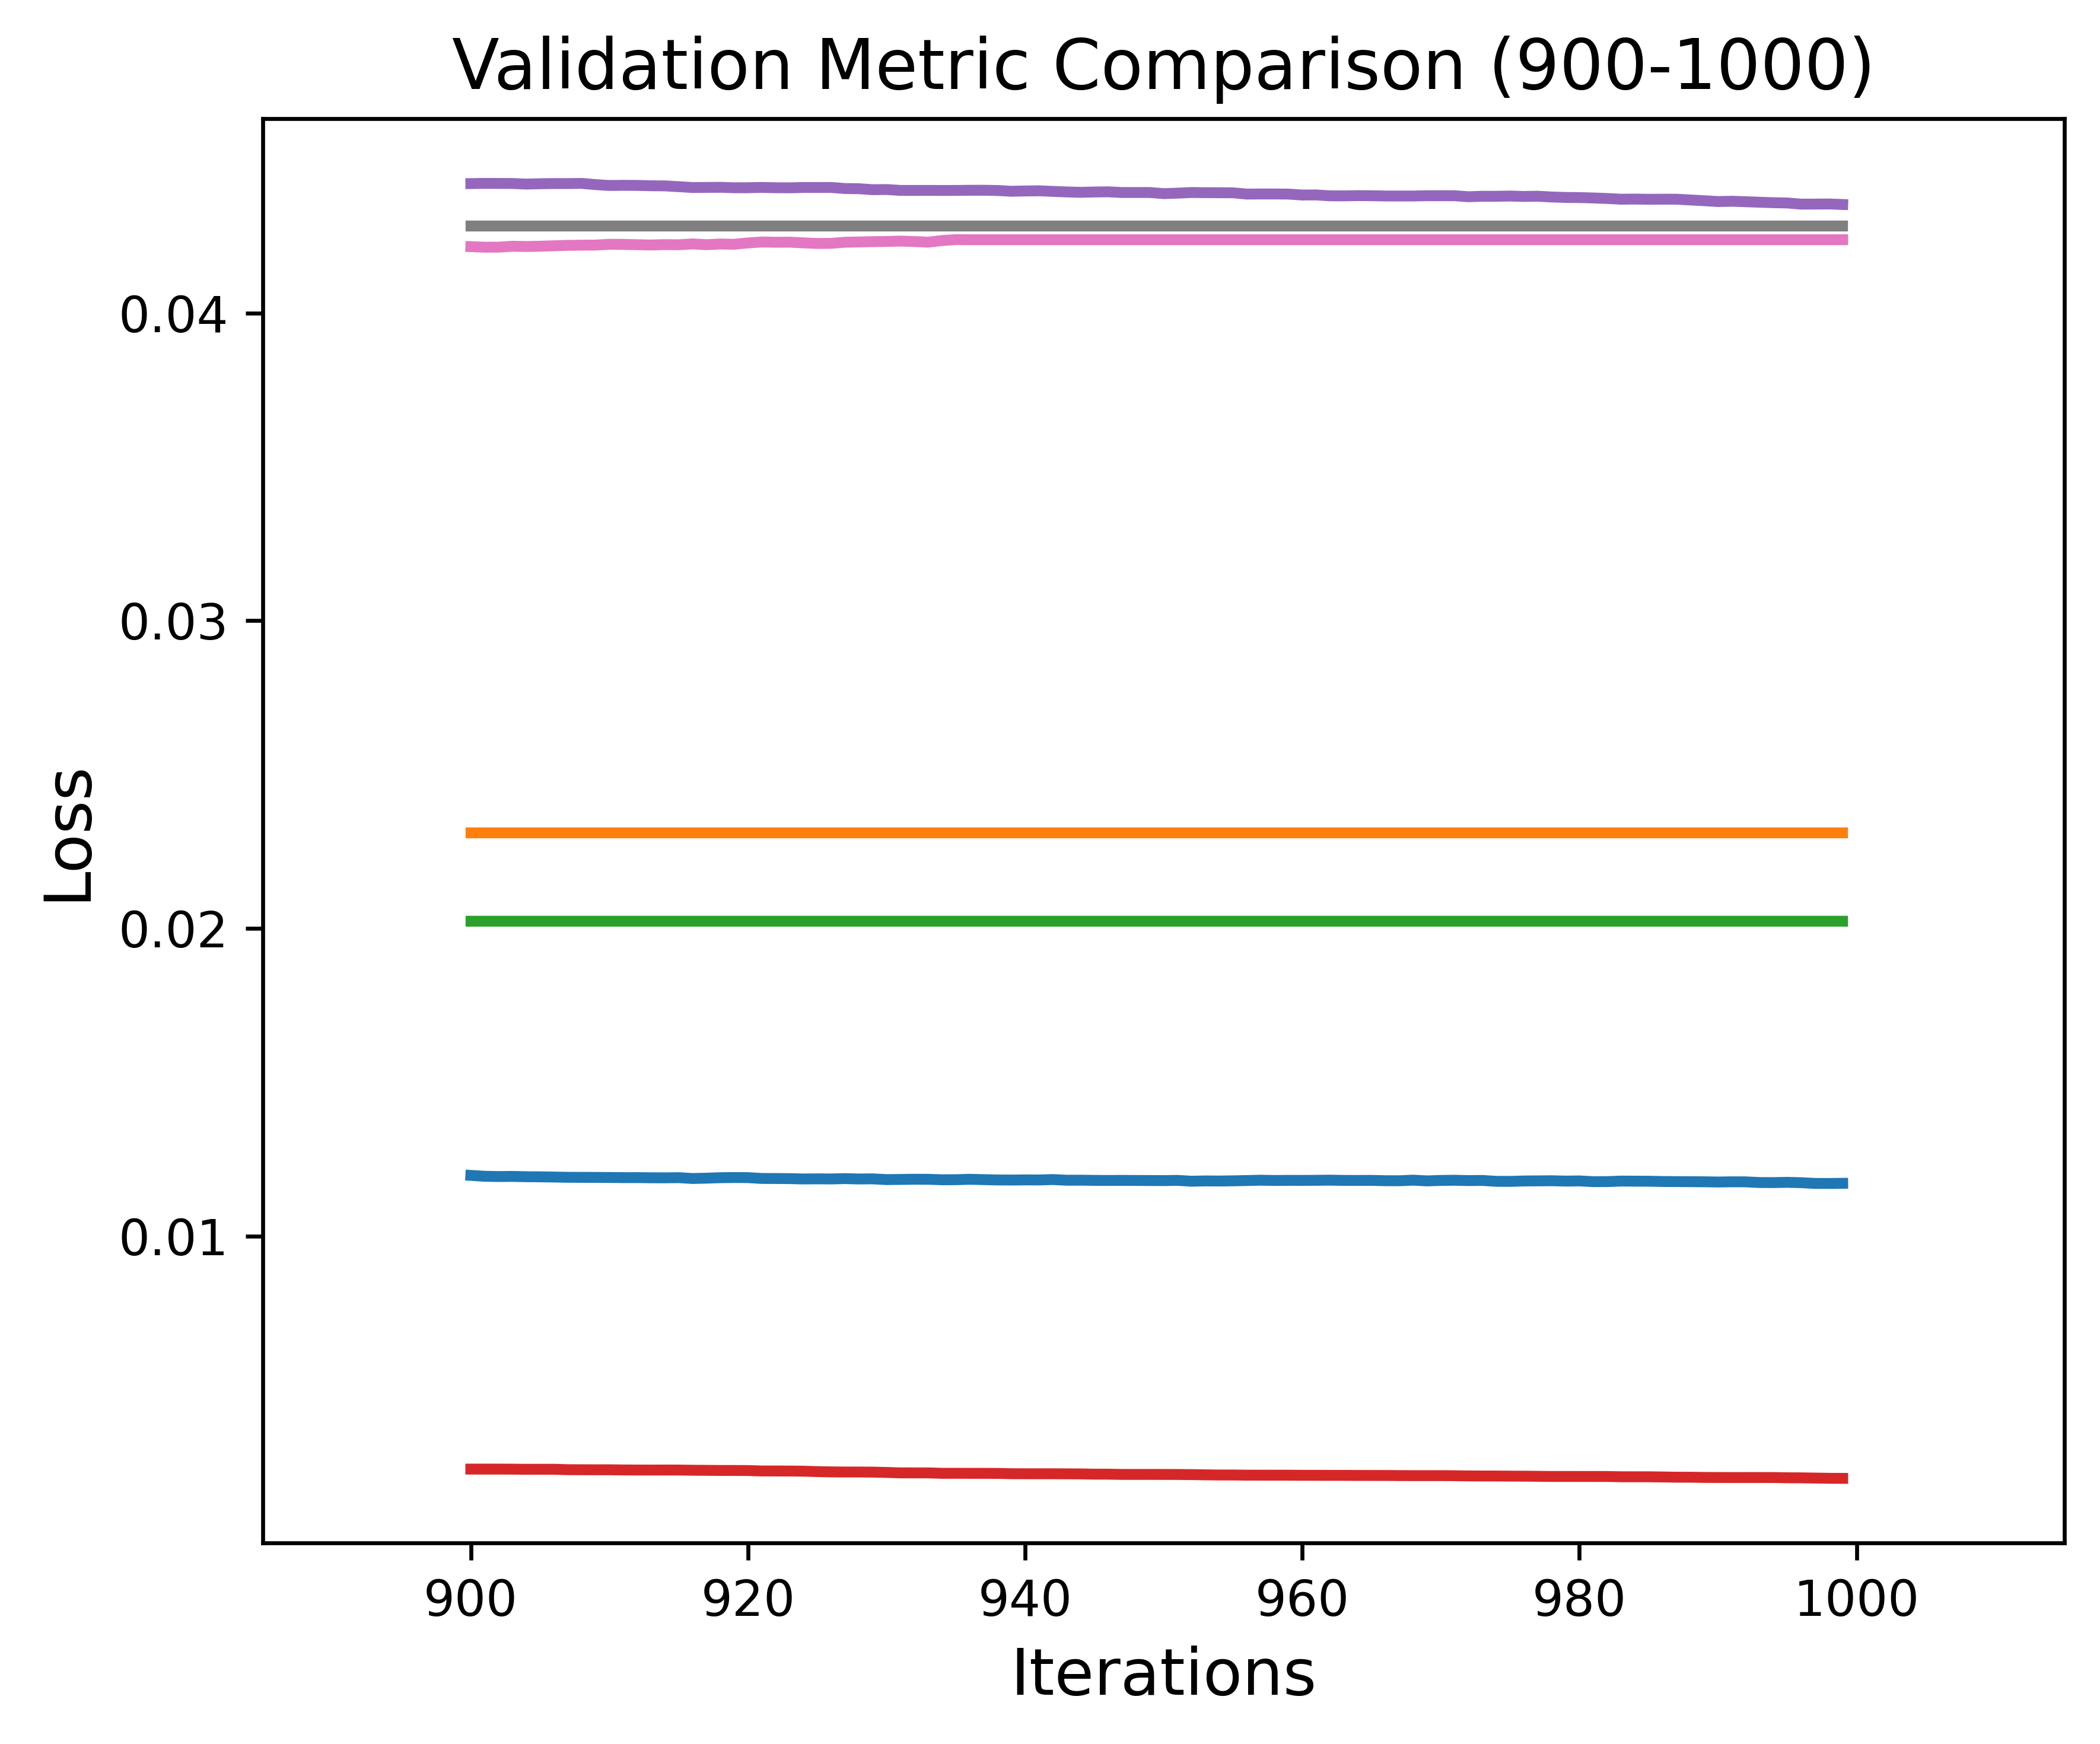

[Saved Figure] /content/drive/MyDrive/ALL_methods_val_curve_900_1000.png

=== 每100次的比較表 ===


,Iteration,HSPSO,PSO,Adaptive PSO,Genetic Algorithms,Artificial Bee Colony,Ant Colony,Differential Evolution
0,900,0.002426,0.042160,0.023108,0.020239,0.042837,0.044210,0.011972
1,999,0.002125,0.042385,0.023108,0.020239,0.042837,0.043531,0.011715


[Saved Table] /content/drive/MyDrive/ALL_methods_val_table_every_99_900_1000.csv


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) 你的檔案路徑設定
# =========================
csv_map = {
    "HSPSO": "/content/drive/MyDrive/HSPSO_metric_curve_1000.csv",
    "PSO":   "/content/drive/MyDrive/PSO_metric_curve_1000.csv",
    "APSO":  "/content/drive/MyDrive/APSO_metric_curve_1000.csv",
    "GA":    "/content/drive/MyDrive/GA_metric_curve_1000.csv",
    "ABC":   "/content/drive/MyDrive/ABC_metric_curve_1000.csv",
    "ACO":   "/content/drive/MyDrive/ACO_metric_curve_1000.csv",
    "DE":    "/content/drive/MyDrive/DE_metric_curve_1000.csv",
}

# =========================
# 2) 圖例名稱（你指定的）
# =========================
name_map = {
    "ACO":  "Ant Colony",
    "ABC":  "Artificial Bee Colony",
    "GA":   "Genetic Algorithms",
    "DE":   "Differential Evolution",
    "APSO": "Adaptive PSO",
    "PSO":  "PSO",
    "HSPSO":"HSPSO"
}

# =========================
# 3) 高區別顏色（你指定的）
# =========================
color_map = {
    "HSPSO": "#d62728",  # 紅
    "PSO":   "#e377c2",  # 橘
    "APSO":  "#ff7f0e",  # 粉紅
    "GA":    "#2ca02c",  # 綠
    "ABC":   "#7f7f7f",  # 藍
    "ACO":   "#9467bd",  # 紫
    "DE":    "#1f77b4",  # 灰
}

# =========================
# 4) 你要畫的區間（可改）
# =========================
x_start, x_end = 900,1000   # 若要放大：100, 1000
step = 99                 # 表格每100取一個值

# =========================
# 5) 讀檔 + 找 Val_ 欄位
# =========================
data = {}  # key -> (it, y)
missing_files = []
missing_valcol = []

for key, path in csv_map.items():
    if not os.path.exists(path):
        missing_files.append(key)
        continue

    df = pd.read_csv(path)

    if "Iteration" not in df.columns:
        print(f"⚠️ [{key}] 找不到 'Iteration' 欄位，略過")
        continue

    val_cols = [c for c in df.columns if str(c).startswith("Val_")]
    if len(val_cols) == 0:
        missing_valcol.append(key)
        continue

    val_col = val_cols[0]

    it = pd.to_numeric(df["Iteration"], errors="coerce").to_numpy()
    y  = pd.to_numeric(df[val_col], errors="coerce").to_numpy()

    mask_valid = (~np.isnan(it)) & (~np.isnan(y))
    it = it[mask_valid].astype(int)
    y  = y[mask_valid].astype(float)

    data[key] = (it, y)

if missing_files:
    print("⚠️ 這些方法的 CSV 找不到（略過）：", missing_files)
if missing_valcol:
    print("⚠️ 這些方法找不到 Val_ 欄位（略過）：", missing_valcol)

if len(data) == 0:
    raise RuntimeError("沒有任何可用資料。請檢查 Drive 掛載、路徑、Iteration/Val_欄位名稱。")

# =========================
# 6) 畫線條圖（全部線同粗）
# =========================
plt.figure(figsize=(6,5), dpi=600)

for key, (it, y) in data.items():
    mask_range = (it >= x_start) & (it <= x_end)
    if mask_range.sum() == 0:
        print(f"⚠️ [{key}] 在區間 {x_start}-{x_end} 沒有資料點，略過")
        continue

    label = name_map.get(key, key)
    color = color_map.get(key, None)

    plt.plot(it[mask_range], y[mask_range],
             label=label,
             linewidth=2.2,        # ✅ 全部一樣粗
             color=color)

plt.xlabel("Iterations", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.title(f"Validation Metric Comparison ({x_start}-{x_end})", fontsize=14)


plt.xlim(x_start-15, x_end+15)


plt.tight_layout()

# 存圖
out_fig_path = f"/content/drive/MyDrive/ALL_methods_val_curve_{x_start}_{x_end}.png"
out_path = "convergence_600dpi.png"

plt.savefig(
    out_path,
    dpi=600,
    format='png',
    bbox_inches='tight',
    facecolor='white'
)


print("Saved 600dpi PNG:", out_path)
plt.show()

print("[Saved Figure]", out_fig_path)

# =========================
# 7) 產生每100次的表格
#    做法：用 iteration = 0,100,200... 取值
#    若該 iteration 不存在，就填 NaN
# =========================
target_iters = np.arange(x_start, x_end + 1, step)

table = pd.DataFrame({"Iteration": target_iters})

for key, (it, y) in data.items():
    label = name_map.get(key, key)

    # 建立 iteration -> value 對應（快速查表）
    it_to_val = dict(zip(it, y))

    col_vals = [it_to_val.get(int(t), np.nan) for t in target_iters]
    table[label] = col_vals  # ✅ 用完整名字當欄名

print("\n=== 每100次的比較表 ===")
display(table)


# 存表格
out_table_path = f"/content/drive/MyDrive/ALL_methods_val_table_every_{step}_{x_start}_{x_end}.csv"
table.to_csv(out_table_path, index=False)

print("[Saved Table]", out_table_path)
